# openCV Image Processing

In this notebook you will try some basics of image processing using openCV.

## Prerequisites

Install opencv: 

`pip install opencv-python 
pip install opencv-contrib-python `

Install matplotlib and numpy:

`pip install matplotlib 
pip install numpy `

If you are using Anaconda (root interpreter), you can install opencv from anaconda sources:

`conda install -c conda-forge opencv`

Or you can navigate to `/path/to/Anaconda/Scripts` and run pip commands from here.


## Let's begin!

To start, we need to read the image using [imread](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_image_display/py_image_display.html) function.

<class 'numpy.ndarray'>
uint8


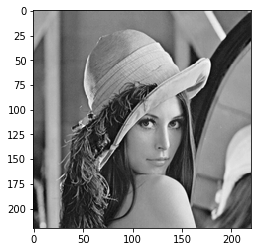

In [111]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline 

image_path = 'openCV-data/lena.png'

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
print(type(img))
print(img.dtype)

plt.imshow(img, cmap='gray')

Note that the image is read as *numpy.ndarray*. That means that you can add constants to the image, multiply them, etc - do any mathematical operation that is valid for numpy.ndarray.

Also the *cv2.IMREAD_GRAYSCALE* parameter tells cv2 to read image in grayscale mode (1 channel, only brightness preserved). We will stick with 1 channel for the ease of coding and understanding.

By default, image type is *uint8*, which is inconvinient for manipulation as we are bounded to [0, 255] values of the pixels. That can lead to [overflowed](http://projects.webappsec.org/w/page/13246946/Integer%20Overflows) pixels.

To overcome that, before any manipulation, we should convert image to *float64(or 32, or 16)* type, perform manipulation, normalize image to [0, 255] values, convert image back to uint8 and then show it. 

Text(0.5, 1.0, 'Normalized')

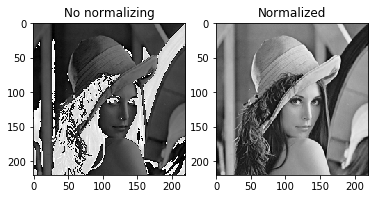

In [112]:
normalizedImg = img.copy()

img += 100000

normalizedImg = normalizedImg.astype(np.float64)
normalizedImg += 100000
cv2.normalize(normalizedImg,  normalizedImg, 0, 255, cv2.NORM_MINMAX)
normalizedImg = normalizedImg.astype(np.uint8)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img, cmap='gray')
ax1.set_title('No normalizing')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(normalizedImg, cmap='gray')
ax2.set_title('Normalized')

## Tasks

I intentionally give no detailed explenation on tasks. All the theory and formulas will be covered in lectures, all the needed functions of cv2 package are provided in the hyperlinks. The rest can be googled).

Now you are ready to perform some tasks (I hope ))). Issues marked with \* are more complicated than others.
1. Generate noise ([random](https://docs.scipy.org/doc/numpy-1.14.1/reference/routines.random.html), salt n pepper) + visualize it
2. Add differnet types of noise to your image and blur it - use different [blur](https://docs.opencv.org/3.1.0/d4/d13/tutorial_py_filtering.html) functions for that
3. Get high frequencies image from the image using using gaussian blur
4. Implement gamma correction technique and apply it to the image
5. Apply gradient filter [-1,1] and compare its work with [advanced filters](https://docs.opencv.org/3.2.0/d5/d0f/tutorial_py_gradients.html) for edges detection 
5. \* Implement Grayworld balancing technique and apply it to the image. Here the image should be read with 3 channels.
6. \* Implement [pipeline](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html) for matching objects in different images. For this issue you should find some image with object(e.g. bear/iphone/Putin), add it to another image and then match initial object image in new image (with object added).

# Task 1.

In [113]:
import cv2
import numpy as np
import random
from copy import deepcopy

In [114]:
def add_noise(img, noise_type):
    img = deepcopy(img)
    noise = np.zeros(img.shape, dtype='uint8')
    if noise_type == 'salt_and_pepper':
        th1 = 0.1
        th2 = 1 - th1
        for i in range(len(img)):
            for j in range(len(img[i])):
                randval = random.random()
                if randval < th1:
                    img[i][j] = 0
                elif randval > th2:
                    img[i][j] = 255
                else:
                    continue
        return img
    elif noise_type == 'uniform':
        cv2.randu(noise, 0, 80)
        return img + noise
    elif noise_type == 'gauss':
        cv2.randn(noise, 0, 255)
        return img + noise
    else:
        print('There is no "{0}" type of noise'.format(noise_type))
        return None

### Black square photo:

In [115]:
a = np.zeros((500,250), dtype='uint8')
b = np.ones((500,250), dtype='uint8') * 255
z = np.concatenate((a, b), axis=1)

a1 = add_noise(z, 'gauss')

cv2.imshow('gauss', a1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [116]:
a = np.zeros((500,250), dtype='uint8')
b = np.ones((500,250), dtype='uint8') * 255
z = np.concatenate((a, b), axis=1)

a2 = add_noise(z, 'uniform')

cv2.imshow('uniform', a2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [117]:
a = np.zeros((500,250), dtype='uint8')
b = np.ones((500,250), dtype='uint8') * 255
z = np.concatenate((a, b), axis=1)

a3 = add_noise(z, 'salt_and_pepper')

cv2.imshow('salt_and_pepper', a3)
cv2.waitKey(0)
cv2.destroyAllWindows()

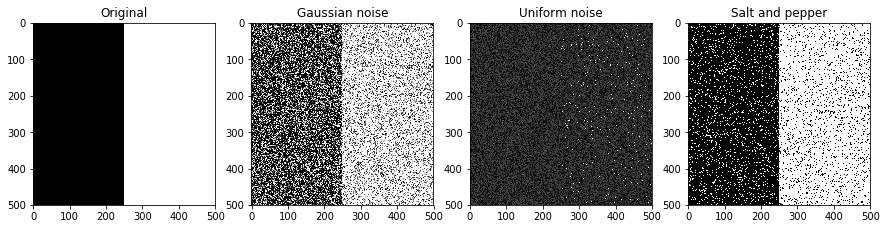

In [118]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))

ax0 = fig.add_subplot(1,4,1)
ax0.set_title('Original')
ax0.imshow(z, cmap='gray')

ax1 = fig.add_subplot(1,4,2)
ax1.set_title('Gaussian noise')
ax1.imshow(a1, cmap='gray')

ax2 = fig.add_subplot(1,4,3)
ax2.set_title('Uniform noise')
ax2.imshow(a2, cmap='gray')

ax3 = fig.add_subplot(1,4,4)
ax3.set_title('Salt and pepper')
ax3.imshow(a3, cmap='gray')

plt.show()

### Lena photo:

In [119]:
image_path = 'openCV-data/lena.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image1 = add_noise(img, 'gauss')

cv2.imshow('gauss', image1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [120]:
image_path = 'openCV-data/lena.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image2 = add_noise(img, 'uniform')

cv2.imshow('uniform', image2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [121]:
image_path = 'openCV-data/lena.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image3 = add_noise(img, 'salt_and_pepper')

cv2.imshow('salt_and_pepper', image3)
cv2.waitKey(0)
cv2.destroyAllWindows()

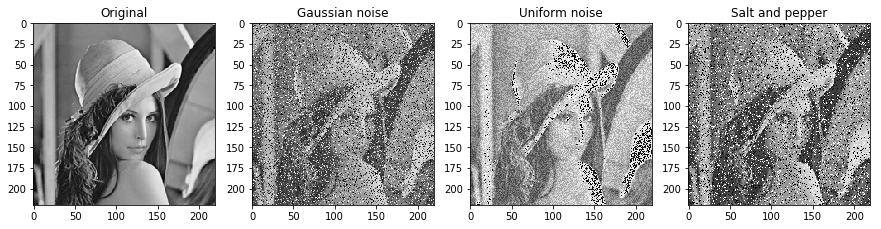

In [122]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))

ax0 = fig.add_subplot(1,4,1)
ax0.set_title('Original')
ax0.imshow(img, cmap='gray')

ax1 = fig.add_subplot(1,4,2)
ax1.set_title('Gaussian noise')
ax1.imshow(image1, cmap='gray')

ax2 = fig.add_subplot(1,4,3)
ax2.set_title('Uniform noise')
ax2.imshow(image2, cmap='gray')

ax3 = fig.add_subplot(1,4,4)
ax3.set_title('Salt and pepper')
ax3.imshow(image3, cmap='gray')

plt.show()

# Task 2.

### 2D Convolution bluring:

In [123]:
image_path = 'openCV-data/lena.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = add_noise(img, 'gauss')

cv2.imshow('gauss', image)

kernel = np.ones((5,5),np.float32)/25
dst1 = cv2.filter2D(image,-1,kernel)

cv2.imshow('2D Convolution', dst1)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [124]:
image_path = 'openCV-data/lena.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = add_noise(img, 'uniform')

cv2.imshow('uniform', image)

kernel = np.ones((5,5),np.float32)/25
dst2 = cv2.filter2D(image,-1,kernel)

cv2.imshow('2D Convolution', dst2)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [125]:
image_path = 'openCV-data/lena.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = add_noise(img, 'salt_and_pepper')

cv2.imshow('salt_and_pepper', image)

kernel = np.ones((5,5),np.float32)/25
dst3 = cv2.filter2D(image,-1,kernel)

cv2.imshow('2D Convolution', dst3)

cv2.waitKey(0)
cv2.destroyAllWindows()

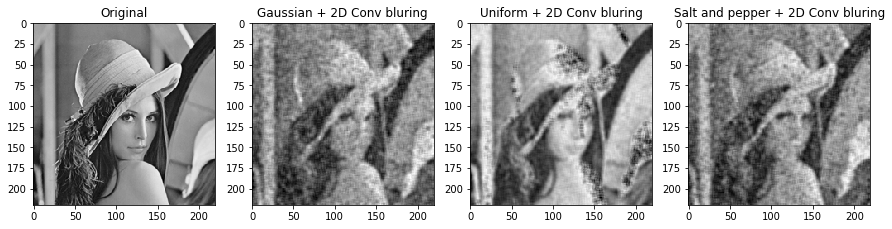

In [126]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))

ax0 = fig.add_subplot(1,4,1)
ax0.set_title('Original')
ax0.imshow(img, cmap='gray')

ax1 = fig.add_subplot(1,4,2)
ax1.set_title('Gaussian + 2D Conv bluring')
ax1.imshow(dst1, cmap='gray')

ax2 = fig.add_subplot(1,4,3)
ax2.set_title('Uniform + 2D Conv bluring')
ax2.imshow(dst2, cmap='gray')

ax3 = fig.add_subplot(1,4,4)
ax3.set_title('Salt and pepper + 2D Conv bluring')
ax3.imshow(dst3, cmap='gray')

plt.show()

### Averaging bluring:

In [127]:
image_path = 'openCV-data/lena.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = add_noise(img, 'gauss')

cv2.imshow('gauss', image)

blur1 = cv2.blur(image,(5,5))

cv2.imshow('Averaging', blur1)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [128]:
image_path = 'openCV-data/lena.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = add_noise(img, 'uniform')

cv2.imshow('uniform', image)

blur2 = cv2.blur(image,(5,5))

cv2.imshow('Averaging', blur2)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [129]:
image_path = 'openCV-data/lena.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = add_noise(img, 'salt_and_pepper')

cv2.imshow('salt_and_pepper', image)

blur3 = cv2.blur(image,(5,5))

cv2.imshow('Averaging', blur3)

cv2.waitKey(0)
cv2.destroyAllWindows()

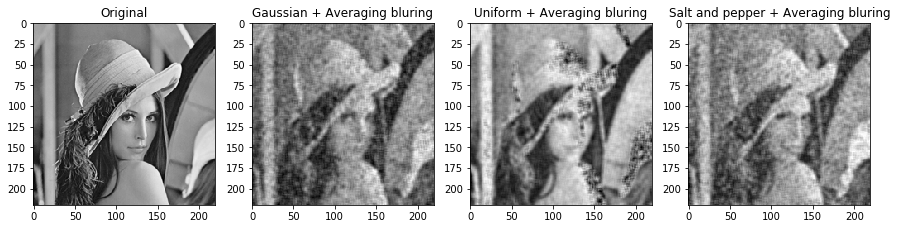

In [130]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))

ax0 = fig.add_subplot(1,4,1)
ax0.set_title('Original')
ax0.imshow(img, cmap='gray')

ax1 = fig.add_subplot(1,4,2)
ax1.set_title('Gaussian + Averaging bluring')
ax1.imshow(blur1, cmap='gray')

ax2 = fig.add_subplot(1,4,3)
ax2.set_title('Uniform + Averaging bluring')
ax2.imshow(blur2, cmap='gray')

ax3 = fig.add_subplot(1,4,4)
ax3.set_title('Salt and pepper + Averaging bluring')
ax3.imshow(blur3, cmap='gray')

plt.show()

### Gaussian Blurring:

In [131]:
image_path = 'openCV-data/lena.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = add_noise(img, 'gauss')

cv2.imshow('gauss', image)

blur1 = cv2.GaussianBlur(image,(5,5),0)

cv2.imshow('Gaussian', blur1)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [132]:
image_path = 'openCV-data/lena.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = add_noise(img, 'uniform')

cv2.imshow('uniform', image)

blur2 = cv2.GaussianBlur(image,(5,5),0)

cv2.imshow('Gaussian', blur2)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [133]:
image_path = 'openCV-data/lena.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = add_noise(img, 'salt_and_pepper')

cv2.imshow('salt_and_pepper', image)

blur3 = cv2.GaussianBlur(image,(5,5),0)

cv2.imshow('Gaussian', blur3)

cv2.waitKey(0)
cv2.destroyAllWindows()

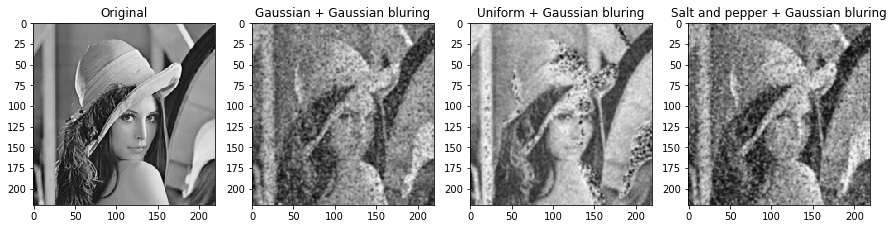

In [134]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))

ax0 = fig.add_subplot(1,4,1)
ax0.set_title('Original')
ax0.imshow(img, cmap='gray')

ax1 = fig.add_subplot(1,4,2)
ax1.set_title('Gaussian + Gaussian bluring')
ax1.imshow(blur1, cmap='gray')

ax2 = fig.add_subplot(1,4,3)
ax2.set_title('Uniform + Gaussian bluring')
ax2.imshow(blur2, cmap='gray')

ax3 = fig.add_subplot(1,4,4)
ax3.set_title('Salt and pepper + Gaussian bluring')
ax3.imshow(blur3, cmap='gray')

plt.show()

### Median Blurring:

In [135]:
image_path = 'openCV-data/lena.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = add_noise(img, 'gauss')

cv2.imshow('gauss', image)

median1 = cv2.medianBlur(image,5)

cv2.imshow('Median', median1)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [136]:
image_path = 'openCV-data/lena.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = add_noise(img, 'uniform')

cv2.imshow('uniform', image)

median2 = cv2.medianBlur(image,5)

cv2.imshow('Median', median2)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [137]:
image_path = 'openCV-data/lena.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = add_noise(img, 'salt_and_pepper')

cv2.imshow('salt_and_pepper', image)

median3 = cv2.medianBlur(image,5)

cv2.imshow('Median', median3)

cv2.waitKey(0)
cv2.destroyAllWindows()

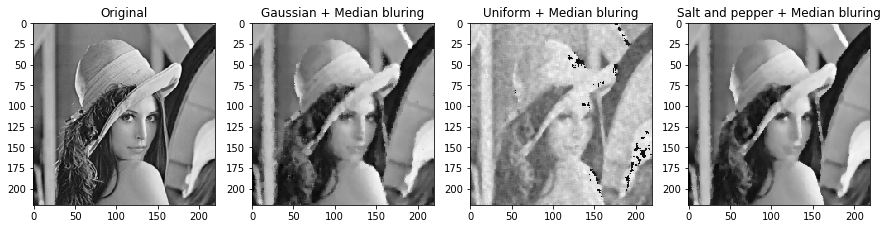

In [138]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))

ax0 = fig.add_subplot(1,4,1)
ax0.set_title('Original')
ax0.imshow(img, cmap='gray')

ax1 = fig.add_subplot(1,4,2)
ax1.set_title('Gaussian + Median bluring')
ax1.imshow(median1, cmap='gray')

ax2 = fig.add_subplot(1,4,3)
ax2.set_title('Uniform + Median bluring')
ax2.imshow(median2, cmap='gray')

ax3 = fig.add_subplot(1,4,4)
ax3.set_title('Salt and pepper + Median bluring')
ax3.imshow(median3, cmap='gray')

plt.show()

### Bilateral Filtering:

In [139]:
image_path = 'openCV-data/lena.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = add_noise(img, 'gauss')

cv2.imshow('gauss', image)

blur1 = cv2.bilateralFilter(image,9,75,75)

cv2.imshow('Bilateral', blur1)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [140]:
image_path = 'openCV-data/lena.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = add_noise(img, 'uniform')

cv2.imshow('uniform', image)

blur2 = cv2.bilateralFilter(image,9,75,75)

cv2.imshow('Bilateral', blur2)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [141]:
mage_path = 'openCV-data/lena.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = add_noise(img, 'salt_and_pepper')

cv2.imshow('salt_and_pepper', image)

blur3 = cv2.bilateralFilter(image,9,75,75)

cv2.imshow('Bilateral', blur3)

cv2.waitKey(0)
cv2.destroyAllWindows()

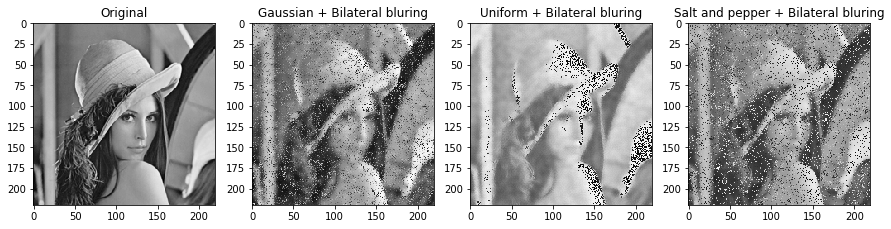

In [142]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))

ax0 = fig.add_subplot(1,4,1)
ax0.set_title('Original')
ax0.imshow(img, cmap='gray')

ax1 = fig.add_subplot(1,4,2)
ax1.set_title('Gaussian + Bilateral bluring')
ax1.imshow(blur1, cmap='gray')

ax2 = fig.add_subplot(1,4,3)
ax2.set_title('Uniform + Bilateral bluring')
ax2.imshow(blur2, cmap='gray')

ax3 = fig.add_subplot(1,4,4)
ax3.set_title('Salt and pepper + Bilateral bluring')
ax3.imshow(blur3, cmap='gray')

plt.show()

# Task 3.

In [143]:
image_path = 'openCV-data/lena.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

cv2.imshow('original', img)

blur = cv2.GaussianBlur(img,(15,15),0)

cv2.imshow('High freq image', blur + img)

cv2.waitKey(0)
cv2.destroyAllWindows()

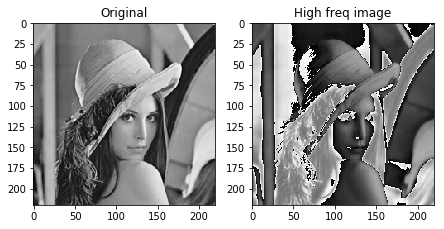

In [144]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))

ax0 = fig.add_subplot(1,4,1)
ax0.set_title('Original')
ax0.imshow(img, cmap='gray')

ax1 = fig.add_subplot(1,4,2)
ax1.set_title('High freq image')
ax1.imshow(blur + img, cmap='gray')

plt.show()

# Task 4.

In [145]:
def gamma_correction(img, gamma):
    original = (((img / 255) ** 2.2) * 255).astype("uint8")
    encoded = (((original / 255) ** (1 / gamma)) * 255).astype("uint8")
    return encoded

In [146]:
image_path = 'openCV-data/lena.png'
img = cv2.imread(image_path, 0)

cv2.imshow('original', img)

im1 = gamma_correction(img, 0.5)

cv2.imshow('Gamma corrected', im1)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [147]:
image_path = 'openCV-data/lena.png'
img = cv2.imread(image_path, 0)

cv2.imshow('original', img)

im2 = gamma_correction(img, 3)

cv2.imshow('Gamma corrected', im2)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [148]:
image_path = 'openCV-data/lena.png'
img = cv2.imread(image_path, 0)

cv2.imshow('original', img)

im3 = gamma_correction(img, 7)

cv2.imshow('Gamma corrected', im3)

cv2.waitKey(0)
cv2.destroyAllWindows()

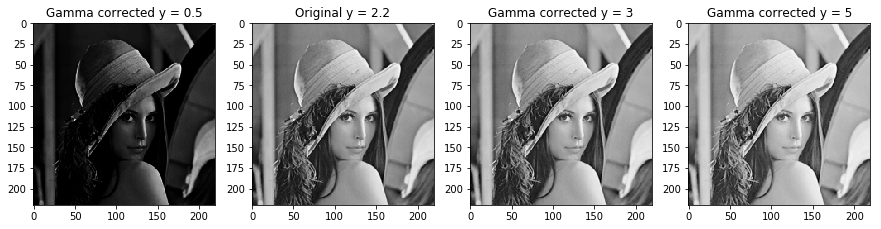

In [149]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))

ax0 = fig.add_subplot(1,4,2)
ax0.set_title('Original y = 2.2')
ax0.imshow(img, cmap='gray')

ax1 = fig.add_subplot(1,4,1)
ax1.set_title('Gamma corrected y = 0.5')
ax1.imshow(im1, cmap='gray')

ax2 = fig.add_subplot(1,4,3)
ax2.set_title('Gamma corrected y = 3')
ax2.imshow(im2, cmap='gray')

ax3 = fig.add_subplot(1,4,4)
ax3.set_title('Gamma corrected y = 5')
ax3.imshow(im3, cmap='gray')

plt.show()

# Task 5.

In [150]:
image_path = 'openCV-data/lena.png'
img = cv2.imread(image_path, 0)

cv2.imshow('original', img)

im = cv2.filter2D(img, kernel=np.array([-1, 1]), ddepth=-1)

cv2.imshow('filtered with [-1, 1]', im)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [151]:
image_path = 'openCV-data/lena.png'
img = cv2.imread(image_path, 0)

cv2.imshow('original', img)

laplacian = cv2.Laplacian(img,cv2.CV_64F)

cv2.imshow('laplacian', laplacian)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [152]:
image_path = 'openCV-data/lena.png'
img = cv2.imread(image_path, 0)

cv2.imshow('original', img)

sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)

cv2.imshow('sobelx', sobelx)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [153]:
image_path = 'openCV-data/lena.png'
img = cv2.imread(image_path, 0)

cv2.imshow('original', img)

sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

cv2.imshow('sobely', sobely)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [154]:
image_path = 'openCV-data/lena.png'
img = cv2.imread(image_path, 0)

cv2.imshow('original', img)

scharrx = cv2.Scharr(img, cv2.CV_64F, 1, 0)

cv2.imshow('scharrx', scharrx)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [155]:
image_path = 'openCV-data/lena.png'
img = cv2.imread(image_path, 0)

cv2.imshow('original', img)

scharry = cv2.Scharr(img, cv2.CV_64F, 0, 1)

cv2.imshow('scharry', scharry)

cv2.waitKey(0)
cv2.destroyAllWindows()

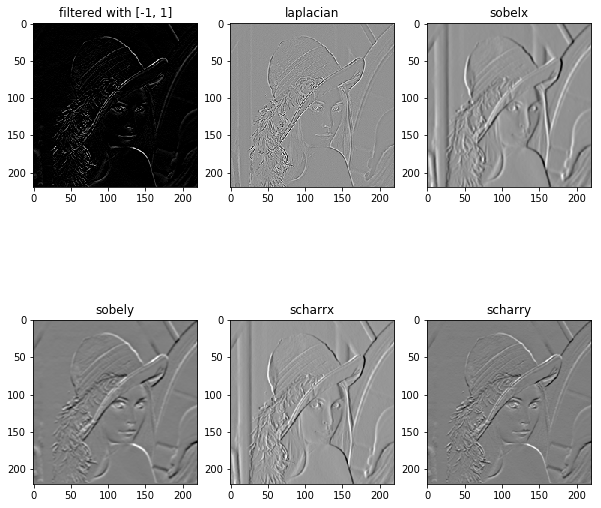

In [156]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))

ax0 = fig.add_subplot(2,3,1)
ax0.set_title('filtered with [-1, 1]')
ax0.imshow(im, cmap='gray')

ax1 = fig.add_subplot(2,3,2)
ax1.set_title('laplacian')
ax1.imshow(laplacian, cmap='gray')

ax2 = fig.add_subplot(2,3,3)
ax2.set_title('sobelx')
ax2.imshow(sobelx, cmap='gray')

ax3 = fig.add_subplot(2,3,4)
ax3.set_title('sobely')
ax3.imshow(sobely, cmap='gray')

ax4 = fig.add_subplot(2,3,5)
ax4.set_title('scharrx')
ax4.imshow(scharrx, cmap='gray')

ax5 = fig.add_subplot(2,3,6)
ax5.set_title('scharry')
ax5.imshow(scharry, cmap='gray')

plt.show()

# Task 6.

In [157]:
def grayworld(img):
    img = deepcopy(img)
    img = img.astype('float64')
    
    R_mean = np.sum(img[:,:,0]) / (img.shape[0] * img.shape[1])
    G_mean = np.sum(img[:,:,1]) / (img.shape[0] * img.shape[1])
    B_mean = np.sum(img[:,:,2]) / (img.shape[0] * img.shape[1])
    
    
    Avg = (R_mean + G_mean + B_mean) / 3.0
    
    img[:,:,0] = (img[:,:,0] * Avg / R_mean)
    img[:,:,1] = (img[:,:,1] * Avg / G_mean)
    img[:,:,2] = (img[:,:,2] * Avg / B_mean)
    
    cv2.normalize(img,  img, 0, 255, cv2.NORM_MINMAX)
    img = img.astype(np.uint8)
    
    return img

In [158]:
image_path = 'openCV-data/lena.png'
img = cv2.imread(image_path, -1)

cv2.imshow('original', img)

im = grayworld(img)

cv2.imshow('grayworld', im)

cv2.waitKey(0)
cv2.destroyAllWindows()

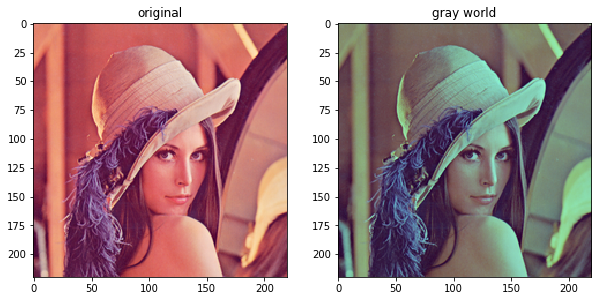

In [159]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))

ax0 = fig.add_subplot(1,2,1)
ax0.set_title('original')
ax0.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

ax1 = fig.add_subplot(1,2,2)
ax1.set_title('gray world')
ax1.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

# Task 7.

In [162]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('openCV-data/lena.png',0)          # queryImage
img2 = cv2.imread('openCV-data/lena.png',0) # trainImage

# Initiate SIFT detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

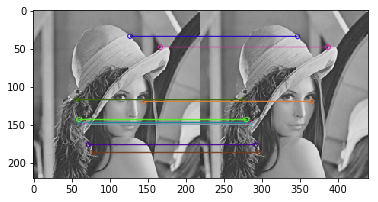

(<matplotlib.image.AxesImage at 0x7f5ca92e34a8>, None)

In [168]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10], flags=2, outImg=None)

plt.imshow(img3),plt.show()